# Veri Temizleme ve Hazırlama
    Veri analizi ve modelleme yapılırken, veri hazırlamaya önemli miktarda zaman harcanır: yükleme, temizleme, dönüştürme ve yeniden düzenleme. Bu tür görevlerin genellikle analistin zamanının% 80'ini veya daha fazlasını aldığı bildirilir. Bazen verilerin dosyalarda veya veritabanlarında depolanma şekli, belirli bir görev için doğru formatta olmayabilir. Pek çok araştırmacı, Python, Perl, R veya Java gibi genel amaçlı bir programlama dili veya sed veya awk gibi Unix metin işleme araçları kullanarak bir formdan diğerine geçici veri işlemeyi seçer. Neyse ki pandas, yerleşik Python dil özelliklerinin yanı sıra, verileri doğru biçime dönüştürmenize olanak tanıyan yüksek düzeyde, esnek ve hızlı bir araç seti sağlar.

# 7.1 Eksik Verilerin İşlenmesi
    Eksik veriler, birçok veri analizi uygulamasında yaygın olarak ortaya çıkar. Pandaların amaçlarından biri, eksik verilerle çalışmayı mümkün olduğunca zahmetsiz hale getirmektir. Örneğin, pandalar nesneleriyle ilgili tüm açıklayıcı istatistikler eksik verileri varsayılan olarak hariç tutar.
    
    Pandas nesnelerinde eksik verilerin temsil edilme biçimi bir şekilde kusurludur, ancak birçok kullanıcı için işlevseldir. Pandas, sayısal veriler için eksik verileri temsil etmek için kayan nokta değeri NaN (Sayı Değil) kullanır. Buna, kolayca tespit edilebilen bir sentinel değer diyoruz.

In [1]:
import pandas as pd
import numpy as np
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [2]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

    İstatistik uygulamalarında NA verileri, var olmayan veya var olan ancak gözlemlenmeyen veriler olabilir (örneğin, veri toplama ile ilgili sorunlar yoluyla). Analiz için verileri temizlerken, veri toplama sorunlarını veya eksik verilerin neden olduğu verilerdeki olası önyargıları belirlemek için eksik verilerin kendisi üzerinde analiz yapmak genellikle önemlidir.

In [4]:
string_data[0] = None

In [5]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

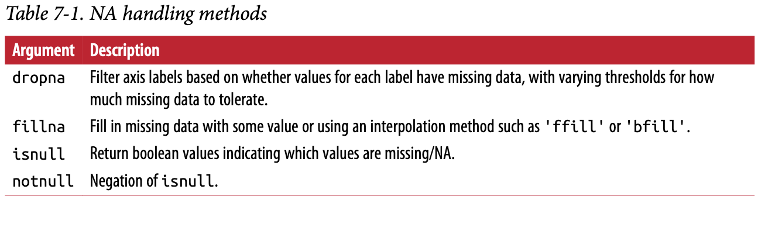

In [6]:
from IPython.display import Image
Image("img/picture45.png")

    Eksik Verileri Filtreleme
        Eksik verileri filtrelemenin birkaç yolu vardır. Bunu her zaman pandas.isnull ve boolean indekslemeyi kullanarak elle yapma seçeneğiniz olsa da, dropna yardımcı olabilir. Bir Seride, Serileri yalnızca boş olmayan veriler ve dizin değerleri ile döndürür.

In [7]:
from numpy import nan as NA

In [8]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [9]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

    Bu şuna eşdeğerdir:

In [10]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

    DataFrame nesnelerinde işler biraz daha karmaşıktır. Tamamı NA olan veya yalnızca herhangi bir NA içeren satırları veya sütunları kaldırmak isteyebilirsiniz. dropna varsayılan olarak eksik bir değer içeren herhangi bir satırı bırakır.

In [11]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])

In [12]:
cleaned = data.dropna()

In [13]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
cleaned

,0,1,2
0,1.0,6.5,3.0


    Passing how='all'yalnızca tümü NA olan satırları kaldıracaktır.

In [15]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


    Sütunları aynı şekilde bırakmak için, axis = 1 değerini iletin.

In [16]:
data[4] = NA

In [17]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [18]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


    DataFrame satırlarını filtrelemenin ilgili bir yolu, zaman serisi verileriyle ilgili olma eğilimindedir. Yalnızca belirli sayıda gözlem içeren satırları tutmak istediğinizi varsayalım. Bunu eşik argümanıyla belirtebilirsiniz.

In [19]:
df = pd.DataFrame(np.random.randn(7, 3))

In [20]:
df.iloc[:4, 1] = NA

In [21]:
df.iloc[:2, 2] = NA

In [22]:
df

,0,1,2
0,-0.458417,NaN,NaN
1,1.283162,NaN,NaN
2,-0.966634,NaN,0.862148
3,-0.479179,NaN,0.839415
4,-0.968487,0.254166,-0.030159
5,-0.933947,-1.393678,-0.493367
6,-2.281998,-0.017278,1.543737


In [23]:
df.dropna()

,0,1,2
4,-0.968487,0.254166,-0.030159
5,-0.933947,-1.393678,-0.493367
6,-2.281998,-0.017278,1.543737


In [24]:
df.dropna(thresh=2)

,0,1,2
2,-0.966634,NaN,0.862148
3,-0.479179,NaN,0.839415
4,-0.968487,0.254166,-0.030159
5,-0.933947,-1.393678,-0.493367
6,-2.281998,-0.017278,1.543737


    1)Eksik Verilerin Doldurulması
        Eksik verileri filtrelemek (ve potansiyel olarak onunla birlikte diğer verileri atmak) yerine, "boşlukları" herhangi bir şekilde doldurmak isteyebilirsiniz. Çoğu amaç için, fillna yöntemi kullanılacak en güçlü işlevdir. Fillna'yı bir sabitle çağırmak, eksik değerleri bu değerle değiştirir.

In [25]:
df.fillna(0)

,0,1,2
0,-0.458417,0.000000,0.000000
1,1.283162,0.000000,0.000000
2,-0.966634,0.000000,0.862148
3,-0.479179,0.000000,0.839415
4,-0.968487,0.254166,-0.030159
5,-0.933947,-1.393678,-0.493367
6,-2.281998,-0.017278,1.543737


    Fillna'yı bir dikteyle çağırarak, her sütun için farklı bir dolgu değeri kullanabilirsiniz.

In [26]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.458417,0.500000,0.000000
1,1.283162,0.500000,0.000000
2,-0.966634,0.500000,0.862148
3,-0.479179,0.500000,0.839415
4,-0.968487,0.254166,-0.030159
5,-0.933947,-1.393678,-0.493367
6,-2.281998,-0.017278,1.543737


    fillna yeni bir nesne döndürür, ancak mevcut nesneyi yerinde değiştirebilirsiniz.

In [27]:
_ = df.fillna(0, inplace=True)

In [28]:
df

,0,1,2
0,-0.458417,0.000000,0.000000
1,1.283162,0.000000,0.000000
2,-0.966634,0.000000,0.862148
3,-0.479179,0.000000,0.839415
4,-0.968487,0.254166,-0.030159
5,-0.933947,-1.393678,-0.493367
6,-2.281998,-0.017278,1.543737


    Yeniden indeksleme için mevcut olan aynı enterpolasyon yöntemleri fillna ile kullanılabilir.

In [29]:
df = pd.DataFrame(np.random.randn(6, 3))

In [30]:
df.iloc[2:, 1] = NA

In [31]:
df.iloc[4:, 2] = NA

In [32]:
df

,0,1,2
0,-0.852809,-0.469623,-1.176329
1,-1.278962,-0.754296,-1.172694
2,0.539798,NaN,1.784983
3,-2.392411,NaN,2.536561
4,1.671046,NaN,NaN
5,-0.020841,NaN,NaN


In [33]:
df.fillna(method='ffill')

,0,1,2
0,-0.852809,-0.469623,-1.176329
1,-1.278962,-0.754296,-1.172694
2,0.539798,-0.754296,1.784983
3,-2.392411,-0.754296,2.536561
4,1.671046,-0.754296,2.536561
5,-0.020841,-0.754296,2.536561


In [34]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.852809,-0.469623,-1.176329
1,-1.278962,-0.754296,-1.172694
2,0.539798,-0.754296,1.784983
3,-2.392411,-0.754296,2.536561
4,1.671046,NaN,2.536561
5,-0.020841,NaN,2.536561


    Fillna ile biraz yaratıcılıkla başka birçok şey yapabilirsiniz. Örneğin, bir Serinin ortalama veya medyan değerini iletebilirsiniz.

In [35]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [36]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

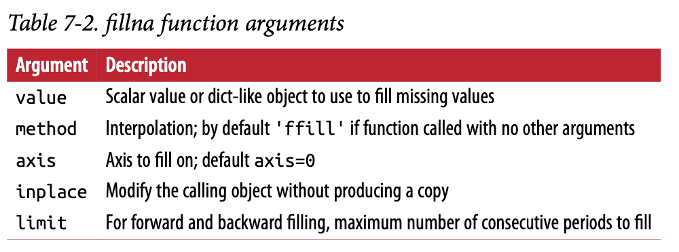

In [37]:
Image("img/picture46.png")

# 7.2 Veri Dönüşümü
   Filtreleme, temizleme ve diğer dönüşümler bir başka önemli işlem sınıfıdır.

# Yinelenenleri Kaldırma
    DataFrame'de birçok nedenden dolayı yinelenen satırlar bulunabilir. İşte bir örnek:

In [38]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})

In [39]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


    Yinelenen DataFrame yöntemi, her satırın yinelenip yinelenmediğini (önceki bir satırda gözlemlenmiştir) gösteren bir boolean Serisi döndürür.

In [40]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

    Benzer şekilde, drop_duplicates, yinelenen dizinin False olduğu bir DataFrame döndürür.

In [41]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


    Bu yöntemlerin her ikisi de varsayılan olarak tüm sütunları dikkate alır; alternatif olarak, kopyaları algılamak için bunların herhangi bir alt kümesini belirtebilirsiniz. Ek bir değer sütunumuz olduğunu ve kopyaları yalnızca "k1" sütununa göre filtrelemek istediğimizi varsayalım:

In [42]:
data['v1'] = range(7)

In [43]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


    duplicated ve drop_duplicates varsayılan olarak ilk gözlenen değer kombinasyonunu korur. Keep = 'last' geçmek sonuncuyu döndürür.

In [44]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


# Bir Fonksiyon veya Eşleme Kullanarak Verileri Dönüştürme
    Birçok veri kümesi için, bir DataFrame'deki bir dizi, Seri veya sütundaki değerlere dayalı olarak bazı dönüşümler gerçekleştirmek isteyebilirsiniz. Çeşitli et türleri hakkında toplanan aşağıdaki varsayımsal verileri göz önünde bulundurun.

In [45]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [46]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


    Her gıdanın geldiği hayvanın türünü gösteren bir sütun eklemek istediğinizi varsayalım. Her bir et türünün hayvan türüne göre bir haritasını yazalım.

In [47]:
meat_to_animal = {
      'bacon': 'pig',
      'pulled pork': 'pig',
      'pastrami': 'cow',
      'corned beef': 'cow',
      'honey ham': 'pig',
      'nova lox': 'salmon'
}

    Bir Serideki map yöntemi, map içeren bir işlevi veya dikte benzeri nesneyi kabul eder, ancak burada bazı etlerin büyük harfle yazılması ve diğerlerinin olmaması nedeniyle küçük bir sorunumuz var. Bu nedenle, str.lower Series yöntemini kullanarak her bir değeri küçük harfe dönüştürmemiz gerekir.

In [48]:
lowercased = data['food'].str.lower()

In [49]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [50]:
data['animal'] = lowercased.map(meat_to_animal)

In [51]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [52]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

    map kullanmak, öğe bazında dönüşümler ve diğer veri temizleme ile ilgili işlemleri gerçekleştirmek için uygun bir yoldur.

# Değerleri Değiştirme
    Eksik verileri fillna yöntemiyle doldurmak, daha genel bir değer değişiminin özel bir durumudur. Daha önce gördüğünüz gibi, harita bir nesnedeki değerlerin bir alt kümesini değiştirmek için kullanılabilir ancak değiştir, bunu yapmak için daha basit ve daha esnek bir yol sağlar. Bu Seriyi ele alalım:

In [53]:
import pandas as pd
import numpy as np
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [54]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

    -999 değerleri, eksik veriler için temel değerler olabilir. Bunları, pandas'ın anladığı NA değerleriyle değiştirmek için, yeni bir Seri üreterek replace'i kullanabiliriz (inplace = True geçmedikçe).

In [55]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

    Aynı anda birden fazla değeri değiştirmek istiyorsanız,

In [56]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [57]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

    Aktarılan argüman ayrıca bir dikte de olabilir.

In [58]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

# Eksen Dizinlerini Yeniden Adlandırma
    Bir Serideki değerler gibi, eksen etiketleri de yeni, farklı şekilde etiketlenmiş nesneler üretmek için bir fonksiyon veya bazı formların eşlemesi ile benzer şekilde dönüştürülebilir. Ayrıca, yeni bir veri yapısı oluşturmadan eksenleri yerinde değiştirebilirsiniz.

In [59]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

    Seri gibi, eksen dizinlerinin de bir map yöntemi vardır.

In [60]:
transform = lambda x: x[:4].upper()

In [61]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

    DataFrame'i yerinde değiştirerek dizine atayabilirsiniz.

In [62]:
data.index = data.index.map(transform)

In [63]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


    Orijinali değiştirmeden bir veri kümesinin dönüştürülmüş bir sürümünü oluşturmak istiyorsanız, kullanışlı bir yöntem yeniden adlandırmaktır.

In [64]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


    Özellikle, yeniden adlandırma, eksen etiketlerinin bir alt kümesi için yeni değerler sağlayan dikteye benzer bir nesneyle birlikte kullanılabilir.

In [65]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


    Yeniden adlandırma, sizi DataFrame'i manuel olarak kopyalama ve dizin ve sütun özniteliklerine atama işinden kurtarır. Bir veri setini yerinde değiştirmek isterseniz, inplace = True yapın.

In [66]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [67]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


# Discretization ve Binning
    Sürekli veriler genellikle ayrıklaştırılır veya başka şekilde analiz için "kutulara" ayrılır. Bir araştırmadaki bir grup insan hakkında veriye sahip olduğunuzu ve onları ayrı yaş grupları halinde gruplamak istediğinizi varsayalım:

In [68]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

    Bunları 18 ila 25, 26 ila 35, 36 ila 60 ve son olarak 61 ve daha büyük kutulara ayıralım. İçin pandas'da bir fonksiyon olan cut kullanmanız gerekir.

In [69]:
bins = [18, 25, 35, 60, 100]

In [70]:
cats = pd.cut(ages, bins)

In [71]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

    Pandas döndürdüğü nesne özel bir Kategorik nesnedir. Gördüğünüz çıktı, pandas.cut tarafından hesaplanan kutuları açıklar. Bin adını belirten dizeler dizisi gibi davranabilirsiniz; dahili olarak, farklı kategori adlarını belirten bir kategori dizisi ve kodlar özelliğindeki yaş verileri için bir etiketleme içerir.

In [72]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [73]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [74]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

    Pd.value_counts (kediler), pandas.cut sonucu için bin sayıları olduğunu unutmayın.

    Aralıklar için matematiksel gösterimle tutarlı olarak, bir parantez kenarın açık olduğu, köşeli parantez ise kapalı (dahil) olduğu anlamına gelir. right = False geçerek hangi tarafın kapalı olduğunu değiştirebilirsiniz.

In [75]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

    Ayrıca, etiketler seçeneğine bir liste veya dizi ileterek kendi bölme adlarınızı da iletebilirsiniz.

In [76]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [77]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

    Açık bölme kenarları yerine kesmek için tam sayı bölme sayısı iletirseniz, verilerdeki minimum ve maksimum değerleri temel alarak eşit uzunlukta bölmeleri hesaplar. Dörde bölünmüş bazı eşit dağıtılmış verilerin durumunu düşünün.

In [78]:
data = np.random.rand(20)

In [79]:
pd.cut(data, 4, precision=2)

[(0.014, 0.25], (0.73, 0.97], (0.25, 0.49], (0.25, 0.49], (0.73, 0.97], ..., (0.49, 0.73], (0.73, 0.97], (0.73, 0.97], (0.014, 0.25], (0.25, 0.49]]
Length: 20
Categories (4, interval[float64]): [(0.014, 0.25] < (0.25, 0.49] < (0.49, 0.73] < (0.73, 0.97]]

    Precision = 2 seçeneği, ondalık duyarlığı iki basamakla sınırlar.

    Yakından ilişkili bir fonksiyon olan qcut, verileri örnek niceliklerine göre depolar. Verilerin dağılımına bağlı olarak, kesimi kullanmak genellikle her bölmenin aynı sayıda veri noktasına sahip olmasına neden olmaz.

In [80]:
data = np.random.randn(1000) # Normal dağılım

In [81]:
cats = pd.qcut(data, 4) # Çeyreğe böl

In [82]:
cats

[(-0.69, 0.0796], (0.708, 2.891], (0.0796, 0.708], (0.0796, 0.708], (-0.69, 0.0796], ..., (0.0796, 0.708], (-2.8729999999999998, -0.69], (0.708, 2.891], (-0.69, 0.0796], (0.0796, 0.708]]
Length: 1000
Categories (4, interval[float64]): [(-2.8729999999999998, -0.69] < (-0.69, 0.0796] < (0.0796, 0.708] < (0.708, 2.891]]

In [83]:
pd.value_counts(cats)

(0.708, 2.891]                  250
(0.0796, 0.708]                 250
(-0.69, 0.0796]                 250
(-2.8729999999999998, -0.69]    250
dtype: int64

    Cut'a benzer şekilde kendi niceliklerinizi aktarabilirsiniz (0 ile 1 arasındaki sayılar dahil).

In [84]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.302, 0.0796], (1.323, 2.891], (0.0796, 1.323], (0.0796, 1.323], (-1.302, 0.0796], ..., (0.0796, 1.323], (-2.8729999999999998, -1.302], (1.323, 2.891], (-1.302, 0.0796], (0.0796, 1.323]]
Length: 1000
Categories (4, interval[float64]): [(-2.8729999999999998, -1.302] < (-1.302, 0.0796] < (0.0796, 1.323] < (1.323, 2.891]]

# Detecting and Filtering Outliers
    Aykırı değerlerin filtrelenmesi veya dönüştürülmesi, büyük ölçüde dizi işlemlerini uygulamakla ilgilidir. Normal olarak dağıtılmış bazı veriler içeren bir DataFrame düşünün.

In [85]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [86]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.014331,-0.023405,-0.016937,0.030316
std,0.989140,0.989658,0.996610,0.975124
min,-3.024661,-3.465696,-3.530589,-2.747337
25%,-0.660784,-0.619299,-0.633871,-0.620241
50%,-0.001481,0.017185,-0.025651,0.023571
75%,0.663013,0.632913,0.596469,0.677556
max,2.947850,3.034787,3.356700,2.884999


    Mutlak değer olarak 3'ü aşan sütunlardan birinde değerler bulmak istediğinizi varsayalım.

In [87]:
col = data[2]

In [88]:
col[np.abs(col) > 3]

2     -3.004751
14     3.356700
302   -3.530589
350    3.173067
766    3.237000
Name: 2, dtype: float64

    3 veya -3'ü aşan bir değere sahip tüm satırları seçmek için, Boolean DataFrame'deki herhangi bir yöntemi kullanabilirsiniz.

In [89]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
2,-2.543617,0.385843,-3.004751,0.473188
14,-0.054385,-1.493799,3.356700,-1.402880
69,1.503818,3.034787,0.391441,-2.420452
212,-1.157102,-3.465696,1.622510,-1.227350
302,-0.386176,-1.019412,-3.530589,-1.316185
350,-1.364555,0.286165,3.173067,-0.909115
468,-0.157741,-3.305889,0.883252,-0.359958
618,-3.024661,0.451220,-0.413561,0.972491
633,-0.270959,-3.418704,-1.248968,0.058171
766,-0.948437,-0.604777,3.237000,0.531985


    Değerler bu kriterlere göre belirlenebilir. Aşağıda -3 ila 3 arasındaki değerleri sınırlamak için kod:

In [90]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [91]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.014355,-0.022236,-0.017168,0.030316
std,0.989064,0.985671,0.992425,0.975124
min,-3.000000,-3.000000,-3.000000,-2.747337
25%,-0.660784,-0.619299,-0.633871,-0.620241
50%,-0.001481,0.017185,-0.025651,0.023571
75%,0.663013,0.632913,0.596469,0.677556
max,2.947850,3.000000,3.000000,2.884999


    Np.sign (data) ifadesi, verilerdeki değerlerin pozitif veya negatif olmasına bağlı olarak 1 ve –1 değerleri üretir.

In [92]:
np.sign(data).head()

,0,1,2,3
0,1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,1.0
3,-1.0,1.0,-1.0,1.0
4,1.0,-1.0,-1.0,1.0


# Permütasyon ve Rastgele Örnekleme
    DataFrame'deki bir Seriyi veya satırları permütasyon (rastgele yeniden sıralama), numpy.random.permutation fonksiyonunu kullanarak yapmak kolaydır. İzin vermek istediğiniz eksenin uzunluğu ile permütasyon çağırmak, yeni sıralamayı gösteren bir tamsayı dizisi üretir.

In [93]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [94]:
sampler = np.random.permutation(5)

In [95]:
sampler

array([2, 0, 3, 4, 1])

    Bu dizi daha sonra iloc tabanlı indekslemede veya eşdeğeri take fonksiyonunda kullanılabilir.

In [96]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [97]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7


    Değiştirmeden rastgele bir alt küme seçmek için, Series ve DataFrame'de örnek yöntemi kullanabilirsiniz.

In [98]:
df.sample(n=3)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
2,8,9,10,11


    Değiştirme ile bir numune oluşturmak için (tekrar seçimlerine izin vermek için), replace = True to sample

In [99]:
choices = pd.Series([5, 7, -1, 6, 4])

In [100]:
draws = choices.sample(n=10, replace=True)

In [101]:
draws

3    6
1    7
0    5
3    6
0    5
4    4
2   -1
0    5
0    5
1    7
dtype: int64

# Hesaplama Göstergesi / Kukla Değişkenler
    İstatistiksel modelleme veya makine öğrenimi uygulamaları için başka bir dönüşüm türü, kategorik bir değişkeni "kukla" veya "gösterge" matrisine dönüştürmektir. Bir DataFrame'deki bir sütunun k farklı değeri varsa, tüm 1'leri ve 0'ları içeren k sütunlu bir matris veya Veri Çerçevesi türetmelisiniz. Pandas'ın bunu yapmak için bir get_dummies işlevi vardır.

In [102]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})

In [103]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


    Bazı durumlarda, gösterge Veri Çerçevesindeki sütunlara, daha sonra diğer verilerle birleştirilebilen bir önek eklemek isteyebilirsiniz. get_dummies'in bunu yapmak için bir önek argümanı vardır.

In [104]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [105]:
df_with_dummy = df[['data1']].join(dummies)

In [106]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


    Bir DataFrame'deki bir satır birden fazla kategoriye aitse, işler biraz daha karmaşıktır. MovieLens 1M veri kümesine bakalım.

In [107]:
mnames = ['movie_id', 'title', 'genres']
import io

In [108]:
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

<ipython-input-108-20ac69f290b4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('datasets/movielens/movies.dat', sep='::',


In [109]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


    Her tür için gösterge değişkenleri eklemek biraz çekişmeyi gerektirir. İlk olarak, veri kümesindeki benzersiz türlerin listesini çıkarıyoruz.

In [110]:
all_genres = []

In [111]:
for x in movies.genres:
    all_genres.extend(x.split('|'))

In [112]:
genres = pd.unique(all_genres)

In [113]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

    DataFrame göstergesini oluşturmanın bir yolu, tüm sıfırlardan oluşan bir DataFrame ile başlamaktır.

In [114]:
zero_matrix = np.zeros((len(movies), len(genres)))

In [115]:
dummies = pd.DataFrame(zero_matrix, columns=genres)

    Şimdi, her filmi yineleyin ve her bir kukla satırındaki girişleri 1'e ayarlayın. Bunu yapmak için, her tür için sütun indekslerini hesaplamak üzere dummies.columns'u kullanırız.

In [116]:
gen = movies.genres[0]

In [117]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [118]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

    Daha sonra, bu indekslere dayalı değerleri ayarlamak için .iloc kullanabiliriz.

In [119]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

    Ardından, daha önce olduğu gibi, bunu filmlerle birleştirebilirsiniz.

In [120]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))

In [121]:
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

    İstatistiksel uygulamalar için kullanışlı bir yol, get_dummies'i cut gibi bir ayrıklaştırma fonksiyonu ile birleştirmektir.

In [122]:
np.random.seed(12345)

In [123]:
values = np.random.rand(10)

In [124]:
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [125]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [126]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


# 7.3 String Manipülasyonu
    Python, dizgi ve metin işleme için kullanım kolaylığı nedeniyle uzun süredir popüler bir ham veri işleme dili olmuştur. Çoğu metin işlemi, dize nesnesinin yerleşik yöntemleriyle basitleştirilir. Daha karmaşık desen eşleştirme ve metin manipülasyonları için düzenli ifadeler gerekebilir. Pandas, dizeyi ve düzenli ifadeleri kısaca tüm veri dizilerine uygulamanızı sağlayarak karışıma ekler ve ayrıca eksik verilerin sıkıntısını giderir.

# Dize Nesne Yöntemleri
    Pek çok dizi birleştirme ve komut dosyası oluşturma uygulamasında, yerleşik dizi yöntemleri yeterlidir. Örnek olarak, virgülle ayrılmış bir dize bölme ile parçalara ayrılabilir.

In [127]:
val = 'a,b,  guido'

In [128]:
val.split(',')

['a', 'b', '  guido']

    split genellikle boşlukları kırpmak için şeritle birleştirilir (satır sonları dahil).

In [129]:
pieces = [x.strip() for x in val.split(',')]

In [130]:
pieces

['a', 'b', 'guido']

In [131]:
first, second, third = pieces

In [132]:
first + '::' + second + '::' + third

'a::b::guido'

    Daha iyi bir yol:

In [133]:
'::'.join(pieces)

'a::b::guido'

In [134]:
'guido' in val

True

In [135]:
val.index(',')

1

In [136]:
val.find(':')

-1

    Bul ve dizin arasındaki farka dikkat edin: dize bulunamadı (–1 döndürür).

    val.index(':')

    Buna bağlı olarak, count, belirli bir alt dizenin oluşum sayısını döndürür.

In [138]:
val.count(',')

2

    replace, bir modelin oluşumlarını bir başkasıyla değiştirir. Genellikle boş bir dize geçirerek kalıpları silmek için de kullanılır.

In [139]:
val.replace(',', '::')

'a::b::  guido'

In [140]:
val.replace(',', '')

'ab  guido'

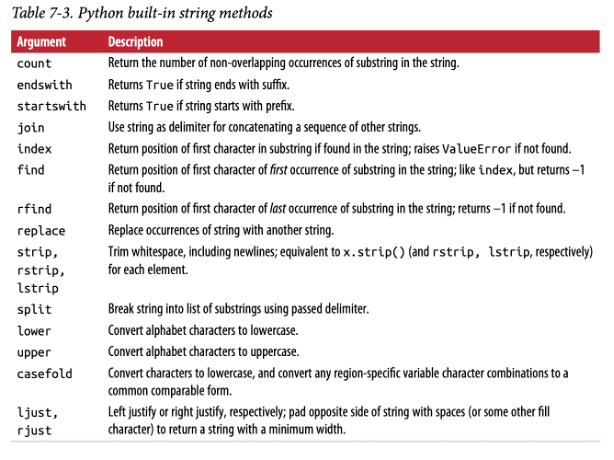

In [141]:
from IPython.display import Image
Image("img/picture47.png")

# Regular Expressions
    Metindeki dize kalıplarını (genellikle daha karmaşık) aramak veya eşleştirmek için esnek bir yol sağlar. Genellikle Regular Expression olarak adlandırılan tek bir ifade, Regular Expression diline göre oluşturulmuş bir dizedir. Python’un yerleşik yeniden modülü, dizelere düzenli ifadeler uygulamaktan sorumludur.

    Re modülü işlevleri üç kategoriye ayrılır: örüntü eşleştirme, ikame ve bölme. Doğal olarak bunların hepsi birbiriyle ilişkilidir; bir normal ifade, daha sonra birçok amaç için kullanılabilen, metinde bulunacak bir kalıbı tanımlar. Basit bir örneğe bakalım:
    bir dizeyi değişken sayıda boşluk karakteriyle (sekmeler, boşluklar ve satırsonları) bölmek istediğimizi varsayalım. Bir veya daha fazla boşluk karakterini tanımlayan normal ifade \ s + şeklindedir.

In [142]:
import re

In [143]:
text = "foo bar\t baz \tqux"

In [144]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

    Re.split ('\ s +', metin) 'i çağırdığınızda, ilk olarak normal ifade derlenir ve ardından iletilen metinde bölünme yöntemi çağrılır. Yeniden kullanılabilir bir regex nesnesi oluşturarak re.compile ile regex'i kendiniz derleyebilirsiniz.

In [145]:
regex = re.compile('\s+')

In [146]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

    Bunun yerine, normal ifadeyle eşleşen tüm kalıpların bir listesini almak istediyseniz, findall kullanırsınız.

In [147]:
regex.findall(text)

[' ', '\t ', ' \t']

    Aynı ifadeyi birçok dizeye uygulamayı düşünüyorsanız, re.compile ile bir regex nesnesi oluşturmanız şiddetle önerilir; bunu yapmak CPU döngülerinden kurtaracaktır.

    eşleştirme ve arama, findall ile yakından ilgilidir. Findall bir dizedeki tüm eşleşmeleri döndürürken, arama yalnızca ilk eşleşmeyi döndürür. Daha kesin bir ifadeyle, yalnızca dizenin başındaki eşleşmeleri eşleştirin. Daha az önemsiz bir örnek olarak, çoğu e-posta adresini tanımlayabilen bir metin bloğunu ve normal bir ifadeyi ele alalım.

In [148]:
text = """Dave dave@google.com
    Steve steve@gmail.com
    Rob rob@gmail.com
    Ryan ryan@yahoo.com
    """
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

    Metinde findall kullanmak, e-posta adreslerinin bir listesini oluşturur.

In [149]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

    search, metindeki ilk e-posta adresi için özel bir eşleşme nesnesi döndürür. Önceki normal ifade için, eşleştirme nesnesi bize dizedeki kalıbın yalnızca başlangıç ve bitiş konumunu söyleyebilir.

In [150]:
m = regex.search(text)

In [151]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [152]:
text[m.start():m.end()]

'dave@google.com'

    regex.match, yalnızca şablonun başlangıcında meydana gelirse eşleşeceği için Yok değerini döndürür.

In [153]:
print(regex.match(text))

None


    Buna bağlı olarak, sub, örüntü oluşumlarının yeni bir dizeyle değiştirildiği yeni bir dize döndürecektir.

In [154]:
print(regex.sub('REDACTED', text))

Dave REDACTED
    Steve REDACTED
    Rob REDACTED
    Ryan REDACTED
    


    E-posta adreslerini bulmak ve her adresi aynı anda üç bileşenine ayırmak istediğinizi varsayalım: kullanıcı adı, alan adı ve alan soneki. Bunu yapmak için, modelin parçalanacak kısımlarının etrafına parantez koyun.

In [155]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [156]:
regex = re.compile(pattern, flags=re.IGNORECASE)

    Bu değiştirilmiş normal ifade tarafından üretilen bir eşleştirme nesnesi, gruplar yöntemiyle desen bileşenlerinin bir demetini döndürür.

In [157]:
m = regex.match('wesm@bright.net')

In [158]:
m.groups()

('wesm', 'bright', 'net')

    findall, kalıpta gruplar olduğunda tuples döndürür.

In [159]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

    sub ayrıca \ 1 ve \ 2 gibi özel semboller kullanarak her maçtaki gruplara erişebilir. \ 1 sembolü ilk eşleşen gruba karşılık gelir, \ 2 ikinciye karşılık gelir ve bu böyle devam eder.

In [160]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
    Steve Username: steve, Domain: gmail, Suffix: com
    Rob Username: rob, Domain: gmail, Suffix: com
    Ryan Username: ryan, Domain: yahoo, Suffix: com
    


    Python'da regular expressions'dan çok daha fazlası vardır.

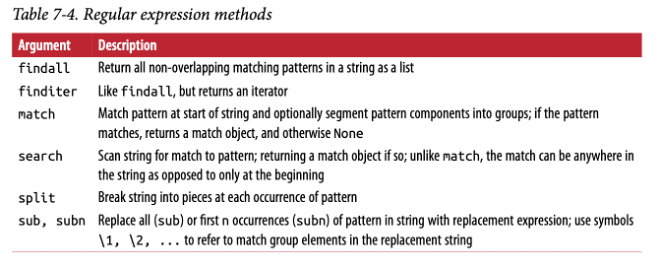

In [161]:
Image("img/picture48.png")

# Pandas'ta Vektörize String İşlevleri
    Analiz için dağınık bir veri kümesini temizlemek, genellikle çok sayıda dizge işleme ve düzenleme gerektirir. Konuları karmaşıklaştırmak için, dizeler içeren bir sütunda bazen eksik veriler olabilir.

In [162]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [163]:
data = pd.Series(data)

In [164]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [165]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

    Her e-posta adresinin içinde str.contains ile 'gmail' olup olmadığını kontrol edebiliriz.

In [166]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

    IGNORECASE gibi herhangi bir re seçeneğiyle birlikte Regular expressions da kullanılabilir.

In [167]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [168]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

    Vektörize edilmiş eleman alımını yapmanın birkaç yolu vardır. Str niteliği için str.get veya index kullanılır:

In [169]:
matches = data.str.match(pattern, flags= re.IGNORECASE)

In [170]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

    Gömülü listelerdeki öğelere erişmek için, bu işlevlerden herhangi birine bir dizin aktarabiliriz.

In [171]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

    Daha fazla pandas String metodları.

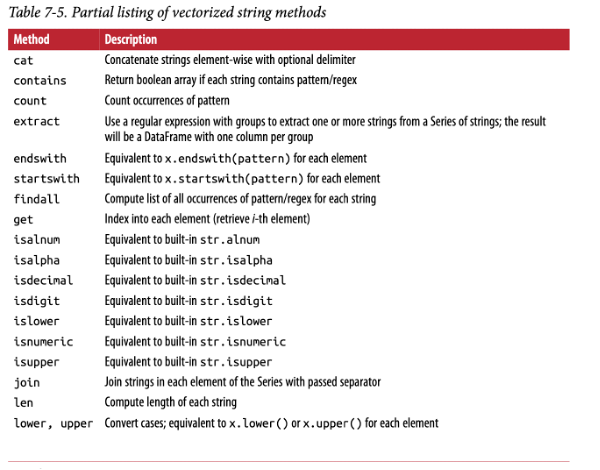

In [172]:
Image("img/picture49.png")

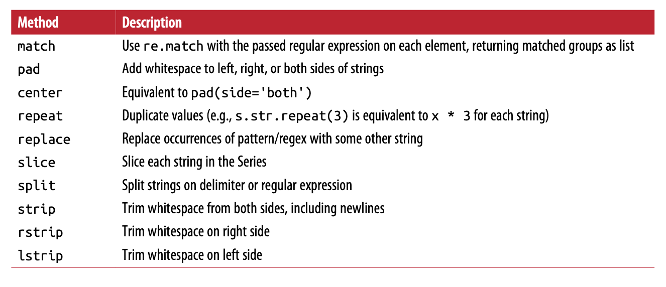

In [173]:
Image("img/picture50.png")